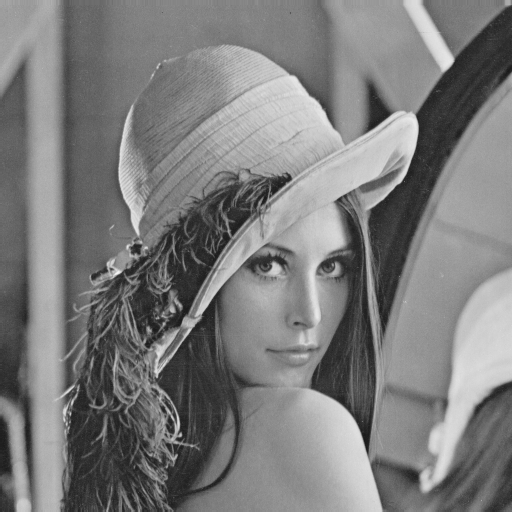

In [5]:
from PIL import Image
import numpy as np
from IPython.display import display  # Import display for Jupyter/Colab

# Open the image (ensure the path is correct)
image_colored = Image.open("/content/lena_gray.gif")

# Display the image
display(image_colored)


In [6]:
print ( " Image Format : " , image_colored . format )
print ( " Image Size : " , image_colored . size )
print ( " Image Mode : " , image_colored . mode )

 Image Format :  GIF
 Image Size :  (512, 512)
 Image Mode :  P


In [7]:
# Get the size (width , height ) and channels (RGB)
width , height = image_colored . size
channels = len( image_colored . getbands () ) # For RGB , it
print ( f" Image shape (RGB): ({ height } , { width } , { channels})")
image_size_grayed = width * height *1
print ( f" Image size (RGB): { image_size_grayed }")

 Image shape (RGB): (512 , 512 , 1)
 Image size (RGB): 262144


In [8]:
image_array_grayed = np . array ( image_colored )
# Display the shape of the NumPy array (height , width ,channels )
print (" Shape of the image array :", image_array_grayed .shape )


 Shape of the image array : (512, 512)


In [9]:
# Sample Implementation :
# Accessing a specific row - 100 th row
row_100 = image_array_grayed[100 , : ]
# Accessing a specific column - 50 th col
col_50 = image_array_grayed[: , 50 ]
# Accessing a specific pixel (row 10 , col 20)
pixel = image_array_grayed[10 , 20 ] # Gets RGB values at (10 ,20)

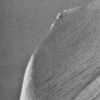

In [10]:
# Define the cropping box (left , upper , right , lower )
left = 100
upper = 50
right = 200
lower = 150
# Crop the image
cropped_image = image_colored . crop (( left , upper , right ,lower ) )
# Display the cropped image
display ( cropped_image )

In [12]:
image_array = np . zeros ((100 , 100 , 3) , dtype = np . uint8 ) #
# Convert the NumPy array back to a Pillow Image object
image_from_array = Image . fromarray ( image_array )
# Display the image
image_from_array . show ()
# Optionally save the image to a file
image_from_array.save("output_image.jpg")

In [14]:
import numpy as np
import matplotlib . pyplot as plt
from PIL import Image
# Load image and convert to grayscale
image = Image . open ("/content/cameraman.png") . convert ("L")
# Convert to NumPy array
image_array = np . array ( image )
# Get image dimensions
height , width = image_array . shape
 # Reshape the image into a 2D array where each rowrepresents a row of pixels
 # This allows PCA to process each row as an observation
data = image_array . reshape ( height , width )

In [15]:
mean = np . mean ( data , axis =0)
# Subtract mean to center the data
centered_data = data - mean

In [17]:
# Compute eigenvalues and eigenvectors
cov_matrix = np . cov ( centered_data , rowvar = False )
eigenvalues , eigenvectors = np . linalg . eigh ( cov_matrix )
# Sort eigenvalues and corresponding eigenvectors in
sorted_indices = np . argsort ( eigenvalues ) [:: -1]
eigenvalues = eigenvalues [ sorted_indices ]
eigenvectors = eigenvectors [: , sorted_indices ]

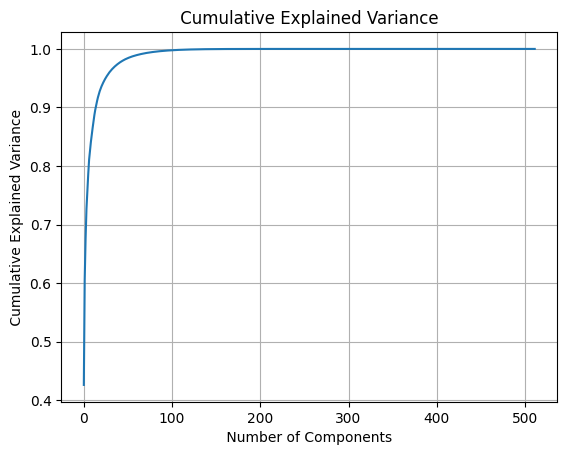

In [18]:
#Plot the explained variance ratio
explained_variance_ratio = eigenvalues / np .sum ( eigenvalues )
plt . plot ( np . cumsum ( explained_variance_ratio ) )
plt . title (" Cumulative Explained Variance ")
plt . xlabel (" Number of Components ")
plt . ylabel (" Cumulative Explained Variance ")
plt . grid ( True )
plt . show ()

In [20]:
k = 50 # Choose k principal components
components = eigenvectors [: , : k ]

In [21]:
compressed_data = np . dot ( centered_data , components )

In [23]:
decompressed_data = np . dot ( compressed_data , components . T ) +mean

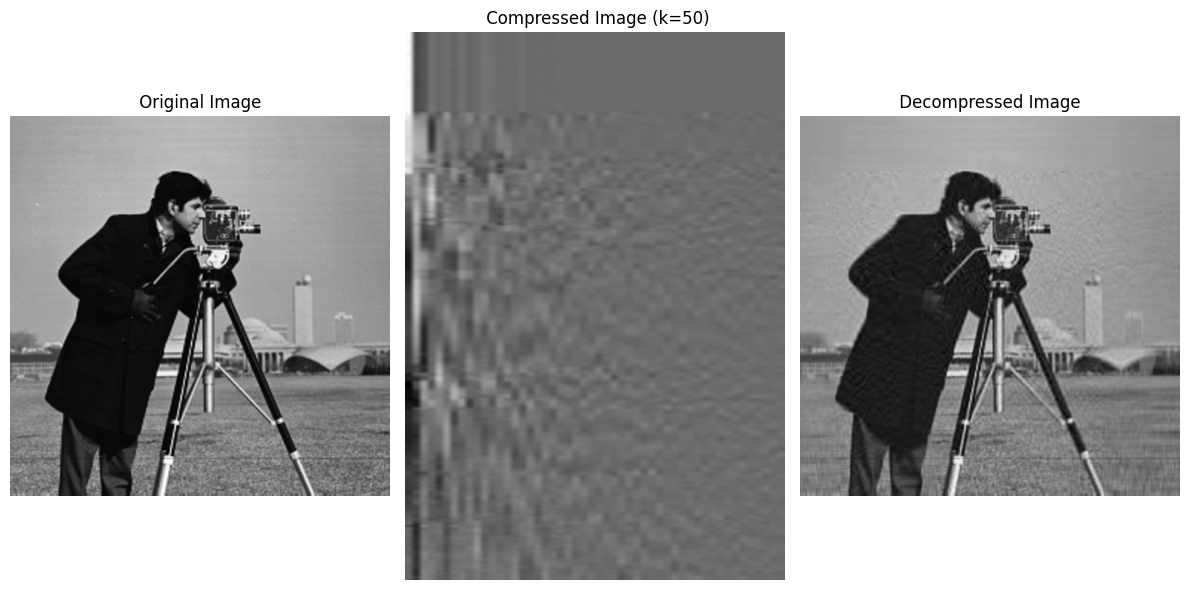

In [30]:
plt . figure ( figsize =(12 , 6) )
# Original Image
plt . subplot (1 , 3 , 1)
plt . imshow ( image_array , cmap ="gray")
plt . title (" Original Image ")
plt . axis ("off")
# Compressed Representation
plt . subplot (1 , 3 , 2)
plt . imshow ( compressed_data , cmap ="gray", aspect ="auto")
plt . title ( f" Compressed Image (k={k})")
plt . axis ("off")
# Decompressed Image
plt . subplot (1 , 3 , 3)
plt . imshow ( decompressed_data , cmap ="gray")
plt . title (" Decompressed Image ")
plt . axis ("off")
plt . tight_layout ()
plt . show ()